In [3]:
import pandas as pd
import numpy as np


In [6]:
# Loading the CSV File:
spam_csv ="/content/sample_data/spam.csv"
df = pd.read_csv(spam_csv)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# count the occurrences of each unique value in the 'Category' column of the DataFrame.
# helps you understand the distribution of categories (e.g., 'spam' and 'ham') in the dataset
df.Category.value_counts()

,count
Category,
ham,4825
spam,747


In [8]:
df.isnull().sum()


,0
Category,0
Message,0


In [9]:
#Data Types and Summary
# helpful to check the data types and a summary of the DataFrame.
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


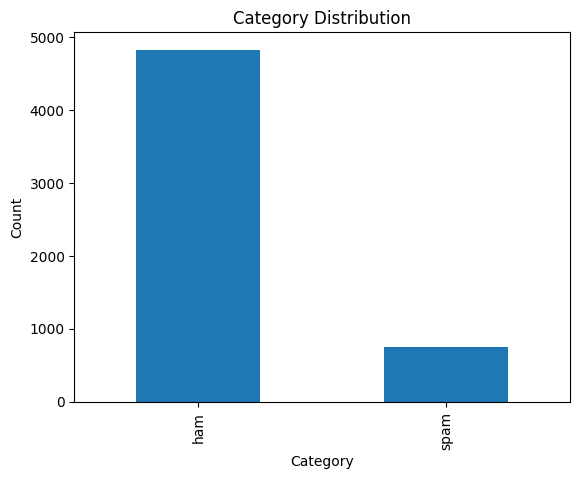

In [10]:
import matplotlib.pyplot as plt
df.Category.value_counts().plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


# Machine learning does not understand words but only numerical data.

This transformation is often used to convert categorical data into numerical data, which can be useful for machine learning algorithms that require numerical input

In [13]:
# Create a new column 'spam' using a for loop
df['spam'] = 0  # Initialize the new column with zeros
for i in range(len(df)):
    if df.loc[i, 'Category'] == 'spam':
        df.loc[i, 'spam'] = 1

print(df.head())  # Display the first few rows to check the new column

  Category                                            Message  spam
0      ham  Go until jurong point, crazy.. Available only ...     0
1      ham                      Ok lar... Joking wif u oni...     0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3      ham  U dun say so early hor... U c already then say...     0
4      ham  Nah I don't think he goes to usf, he lives aro...     0


In [15]:
df.shape

(5572, 3)

# train_test_split
function is used to split arrays or matrices into random train and test subsets. This is essential for evaluating the performance of a machine learning model on unseen data.

In [18]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X_train: Training set features (messages)
# X_test: Testing set features (messages)
# y_train: Training set labels (spam indicators)
# y_test: Testing set labels (spam indicators)
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.2)

X_train and y_train will be used to train the machine learning model.

X_test and y_test will be used to evaluate the performance of the trained model.

Purpose of the Splitting:

    Training Set: This subset is used to train the machine learning model. The model learns the patterns and relationships from this data.
    Testing Set: This subset is used to evaluate the performance of the trained model. It provides an unbiased estimate of the model's performance on unseen data, helping to detect issues like overfitting.

In [22]:
print("X_train.shape:",X_train.shape )
print("X_test.shape:",X_test.shape )

X_train.shape: (4457,)
X_test.shape: (1115,)


In [23]:
X_train[:5][4320]

,Message
4320,Are you still playing with gautham?
2430,Guess who am I?This is the first time I created a web page WWW.ASJESUS.COM read all I wrote. I'm waiting for your opinions. I want to be your friend 1/1
3486,No:-)i got rumour that you going to buy apartment in chennai:-)
2294,Hello. Damn this christmas thing. I think i have decided to keep this mp3 that doesnt work.
175,"Well, i'm gonna finish my bath now. Have a good...fine night."


In [24]:
X_train[:5][4320]

'Are you still playing with gautham?'

In [25]:
type(y_train)

pandas.core.series.Series

In [26]:
y_train[:4]

,spam
4320,0
2430,1
3486,0
2294,0


## Example of Vectorization

CountVectorizer is used to convert a collection of text documents into a matrix of token counts. This is a common method for text feature extraction in natural language processing.

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'I am going to work.',
    'I am goig to schoo;.',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['am', 'goig', 'going', 'schoo', 'to', 'work'], dtype=object)

In [47]:
print(X.toarray())

[[1 0 1 0 1 1]
 [1 1 0 1 1 0]]


### Vectorizing spam.csv

In [33]:
# link countVectorizer https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_train_csv = vect.fit_transform(X_train.values)
X_train_csv


<4457x7778 sparse matrix of type '<class 'numpy.int64'>'
	with 59261 stored elements in Compressed Sparse Row format>

In [34]:
X_train_csv.toarray()[:3][0]

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
X_train_csv.shape

(4457, 7778)

In [40]:
dir(vect)[10:20]

['__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__']

In [44]:
vect.vocabulary_

{'are': 1042,
 'you': 7739,
 'still': 6522,
 'playing': 5290,
 'with': 7577,
 'gautham': 3093,
 'guess': 3280,
 'who': 7529,
 'am': 924,
 'this': 6892,
 'is': 3760,
 'the': 6852,
 'first': 2877,
 'time': 6941,
 'created': 2057,
 'web': 7457,
 'page': 5083,
 'www': 7672,
 'asjesus': 1088,
 'com': 1886,
 'read': 5632,
 'all': 899,
 'wrote': 7660,
 'waiting': 7393,
 'for': 2944,
 'your': 7745,
 'opinions': 4996,
 'want': 7412,
 'to': 6972,
 'be': 1266,
 'friend': 3009,
 'no': 4815,
 'got': 3208,
 'rumour': 5895,
 'that': 6849,
 'going': 3182,
 'buy': 1579,
 'apartment': 1002,
 'in': 3655,
 'chennai': 1761,
 'hello': 3410,
 'damn': 2140,
 'christmas': 1801,
 'thing': 6882,
 'think': 6884,
 'have': 3370,
 'decided': 2194,
 'keep': 3921,
 'mp3': 4626,
 'doesnt': 2380,
 'work': 7619,
 'well': 7487,
 'gonna': 3192,
 'finish': 2863,
 'my': 4682,
 'bath': 1240,
 'now': 4864,
 'good': 3193,
 'fine': 2860,
 'night': 4797,
 'dear': 2185,
 'where': 7518,
 'call': 1607,
 'me': 4419,
 'wat': 7430,
 'd

In [45]:
vect.get_feature_names_out()[3456]

'hitler'

In [41]:
# get_feature_names_out is a numpy array that contain all words
vect.get_feature_names_out().shape

(7778,)

In [31]:
vect.get_feature_names_out()[1000:1100]

array(['aom', 'apart', 'apartment', 'apes', 'apeshit', 'aphex', 'apnt',
       'apo', 'apologetic', 'apologise', 'apologize', 'app', 'apparently',
       'appeal', 'appear', 'applausestore', 'applebees', 'apples',
       'application', 'apply', 'applyed', 'applying', 'appointment',
       'appreciate', 'appreciated', 'approaches', 'approaching',
       'appropriate', 'approve', 'approved', 'approx', 'apps', 'appt',
       'april', 'aproach', 'aptitude', 'aquarius', 'ar', 'arab', 'arcade',
       'archive', 'ard', 'are', 'area', 'aren', 'arent', 'aretaking',
       'areyouunique', 'argentina', 'argh', 'argue', 'arguing',
       'argument', 'aries', 'arise', 'arises', 'arithmetic', 'arm',
       'armand', 'armenia', 'arms', 'arng', 'arngd', 'arnt', 'around',
       'aroundn', 'arr', 'arrange', 'arrested', 'arrival', 'arrive',
       'arrow', 'arsenal', 'art', 'artists', 'arts', 'arty', 'arul',
       'arun', 'as', 'asa', 'asap', 'asda', 'ashes', 'ashley', 'ashwini',
       'asia', 'asian

In [49]:
X_train_np = X_train_csv.toarray()
X_train_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
# want to where numpy not equl to zero
np.where(X_train_np[0]!=0)

(array([1042, 3093, 5290, 6522, 7577, 7739]),)

In [51]:
X_train_np[0][1042]

1

In [57]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_csv, y_train)


MultinomialNB()

In [58]:
X_test_csv = vect.transform(X_test)

In [60]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_csv)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       964
           1       0.98      0.93      0.96       151

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [61]:
email =[
    "Does uncle timi help in clearing cars",
    "I came hostel. I m going to sleep. Plz call me up before class. Hrishi.",
    '07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow'
]

email_count = vect.transform(email)
model.predict(email_count)

array([0, 0, 1])

## Interpretation: array([0, 0, 1])

0 is not spam

0 is not spam

1  is a spam

### Pipeline

In [63]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [64]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [65]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       964
           1       0.98      0.93      0.96       151

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

